In [26]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
#%matplotlib inline

# 回転行列のよる回転

/opt/homebrew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/stride_tricks.py:342: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.array(array, copy=False, subok=subok)
/opt/homebrew/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) 

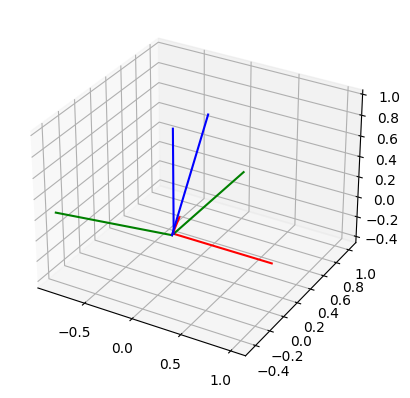

In [114]:
# x軸周りに回転する同時変換行列
def Hx(theta):
    return np.array([[1,             0,              0, 0],
                     [0, np.cos(theta), -np.sin(theta), 0],
                     [0, np.sin(theta),  np.cos(theta), 0],
                     [0,             0,              0, 1]])

# y軸周りに回転する同時変換行列
def Hy(theta):
    return np.array([[ np.cos(theta), 0,  np.sin(theta), 0],
                     [             0, 1,              0, 0],
                     [-np.sin(theta), 0,  np.cos(theta), 0],
                     [0,              0,              0, 1]])

# z軸周りに回転する同時変換行列
def Hz(theta):
    return np.array([[np.cos(theta),  -np.sin(theta), 0, 0],
                     [np.sin(theta),   np.cos(theta), 0, 0],
                     [            0,               0, 1, 0],
                     [            0,               0, 0, 1]])



phi = 90.0 # 50.0
theta = 30.0 #10.0
psi = 30.0 #10.0
phi = math.radians(phi); theta = math.radians(theta); psi = math.radians(psi) # deg -> rad

# ZYZオイラー角
R_zyz = Hz(phi)@Hy(theta)@Hz(psi)


v_x = R_zyz@np.array([[1],
                      [0],
                      [0],
                      [1]])

v_y = R_zyz@np.array([[0],
                      [1],
                      [0],
                      [1]])

v_z = R_zyz@np.array([[0],
                      [0],
                      [1],
                      [1]])  


# 描画 ------------------------------------------------
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 基準座標系
ax.plot([0.01, 0.01+1], [0.01,   0.01], [0.01,   0.01], color="red")
ax.plot([0.01, 0.01]  , [0.01, 0.01+1], [0.01,   0.01], color="green")
ax.plot([0.01, 0.01]  , [0.01,   0.01], [0.01, 0.01+1], color="blue")

ax.plot([0, v_x[0]], [0, v_x[1]], [0, v_x[2]], color="red")
ax.plot([0, v_y[0]], [0, v_y[1]], [0, v_y[2]], color="green")
ax.plot([0, v_z[0]], [0, v_z[1]], [0, v_z[2]], color="blue")

plt.show()


# クォータ二オンによる回転

1.0
quaternion(0, 2.22044604925031e-16, 1, 0)
quaternion(0, -1, 2.22044604925031e-16, 0)
quaternion(0, 0, 0, 1)


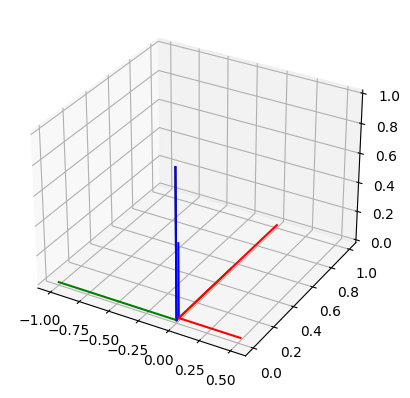

In [134]:
theta = 90.0
theta = math.radians(theta)

l = [0, 0, 1] # 回転軸の方向を示すベクトル（大きさ1のベクトル）
unit_l = l / np.sqrt(l[0]**2 + l[1]**2 + l[2]**2)# 単位ベクトルに
print(np.sqrt(unit_l[0]**2 + unit_l[1]**2 + unit_l[2]**2)) # サイズが1であることを確認

q_w = math.cos(theta/2); # q_w : スカラ部 <- 回転軸（ベクトル部）周りに何度回転するか
q_x = unit_l[0]*math.sin(theta/2); q_y = unit_l[1]*math.sin(theta/2); q_z = unit_l[2]*math.sin(theta/2)  # q_x, q_y, q_z : ベクトル部 <- 回転軸を示すベクトル

# q = np.quaternion(q_w, q_x*i, q_y*j, q_z*k)
# i, j, kは以下のように，複素数の虚部のような役割をすることに注意
# i^2 = -1
# j^2 = -1
# k^2 = -1
# ij = -ji = k
# jk = -kj = i
# ki = -ik = j
q = np.quaternion(q_w, q_x, q_y, q_z) # <- 内部的には，(q_w, q_x*i, q_y*j, q_z*k) として処理される
conj_q = np.quaternion(q.w, -q.x, -q.y, -q.z) # 共役クォータニオン(conj_q = q.conj()でもOK)
v_x = np.quaternion(0, 1, 0, 0) # 回転させたいベクトル
v_y = np.quaternion(0, 0, 1, 0) # 回転させたいベクトル
v_z = np.quaternion(0, 0, 0, 1) # 回転させたいベクトル
after_v_x = np.dot(np.dot(q, v_x), conj_q) # q@v@conj_q と同義（np.quaternionでは，@演算子が使えないためnp.dotで記述）
after_v_y = np.dot(np.dot(q, v_y), conj_q) # q@v@conj_q と同義（np.quaternionでは，@演算子が使えないためnp.dotで記述）
after_v_z = np.dot(np.dot(q, v_z), conj_q) # q@v@conj_q と同義（np.quaternionでは，@演算子が使えないためnp.dotで記述）

print(after_v_x) # 回転後のクォータ二オンのベクトル部が v_x の回転後の座標
print(after_v_y) # 回転後のクォータ二オンのベクトル部が v_y の回転後の座標
print(after_v_z) # 回転後のクォータ二オンのベクトル部が v_z の回転後の座標


# 描画 ------------------------------------------------------------
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 基準座標系を描画
ax.plot([0.01, 0.01+0.5],  [0.01,   0.01]  , [0.01,   0.01]  ,color="red")
ax.plot([0.01, 0.01]    ,  [0.01, 0.01+0.5], [0.01,   0.01]  , color="green")
ax.plot([0.01, 0.01]    ,  [0.01,   0.01]  , [0.01, 0.01+0.5], color="blue")

# 回転軸描画
ax.plot([0, unit_l[0]], [0, unit_l[1]], [0, unit_l[2]], color="black")

# 回転後の
ax.plot([0, after_v_x.x], [0, after_v_x.y], [0, after_v_x.z], color="red")
ax.plot([0, after_v_y.x], [0, after_v_y.y], [0, after_v_y.z], color="green")
ax.plot([0, after_v_z.x], [0, after_v_z.y], [0, after_v_z.z], color="blue")

plt.show()



# 「クォータ二オン -> 回転行列」による回転

[[0.]
 [1.]
 [0.]]
[[-1.000000e+00]
 [ 6.123234e-17]
 [ 0.000000e+00]]
[[0.]
 [0.]
 [1.]]


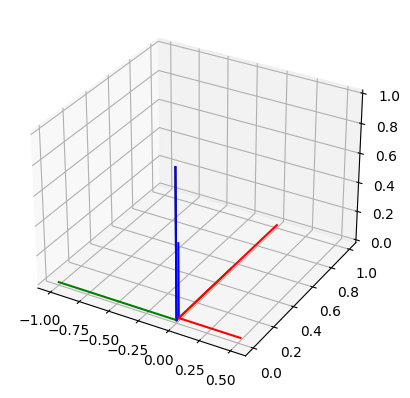

In [133]:
def H_quat(theta, lx, ly, lz):
    return np.array([[(1-np.cos(theta))*lx**2                  , (1-np.cos(theta))*lx*ly-lz*np.sin(theta), (1-np.cos(theta))*lz*lx+ly*np.sin(theta)],
                     [(1-np.cos(theta))*lx*ly+lz*np.sin(theta) , (1-np.cos(theta))*ly**2+np.cos(theta)   , (1-np.cos(theta))*ly*lz-lx*np.sin(theta)],
                     [(1-np.cos(theta))*lz*lx-ly*np.sin(theta) , (1-np.cos(theta))*ly*lz+lx*np.sin(theta), (1-np.cos(theta))*lz**2+np.cos(theta)]])

theta = 90.0
theta = math.radians(theta)
l = [0, 0, 1] # 回転軸の方向を示すベクトル（大きさ1のベクトル）
unit_l = l / np.sqrt(l[0]**2 + l[1]**2 + l[2]**2)# 単位ベクトルに
v_x = np.array([[1], 
                [0],
                [0]])
v_y = np.array([[0], 
                [1],
                [0]])
v_z = np.array([[0], 
                [0],
                [1]])
after_v_x= H_quat(theta, unit_l[0], unit_l[1], unit_l[2])@v_x
after_v_y = H_quat(theta, unit_l[0], unit_l[1], unit_l[2])@v_y
after_v_z = H_quat(theta, unit_l[0], unit_l[1], unit_l[2])@v_z
print(after_v_x)
print(after_v_y)
print(after_v_z)


# 描画 ------------------------------------------------------------
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 基準座標系を描画
ax.plot([0.01, 0.01+0.5],  [0.01,   0.01]  , [0.01,   0.01]  ,color="red")
ax.plot([0.01, 0.01]    ,  [0.01, 0.01+0.5], [0.01,   0.01]  , color="green")
ax.plot([0.01, 0.01]    ,  [0.01,   0.01]  , [0.01, 0.01+0.5], color="blue")

# 回転軸描画
ax.plot([0, unit_l[0]], [0, unit_l[1]], [0, unit_l[2]], color="black")

# 回転後の
ax.plot([0, after_v_x[0]], [0, after_v_x[1]], [0, after_v_x[2]], color="red")
ax.plot([0, after_v_y[0]], [0, after_v_y[1]], [0, after_v_y[2]], color="green")
ax.plot([0, after_v_z[0]], [0, after_v_z[1]], [0, after_v_z[2]], color="blue")

plt.show()


# 単位クォータ二オンによる大円補間